## HackerEarth Machine Learning challenge:Calculate the severity of an airplane accident


# This challenge will encourage you to apply your Machine Learning skills to build models that can anticipate the severity of any airplane accident
##This challenge will help you enhance your knowledge of classification actively. Classification is one of the basic building blocks of Machine Learning

In [38]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplot.inline
import seaborn as sns
import datetime as dt

UsageError: Line magic function `%matplot.inline` not found.


## Reading the files

In [2]:
train = pd.read_csv("C:/Users/User/Desktop/ML hub/HackerEarth problem on ML/train.csv")
test = pd.read_csv("C:/Users/User/Desktop/ML hub/HackerEarth problem on ML/test.csv")
sample_submission = pd.read_csv("C:/Users/User/Desktop/ML hub/HackerEarth problem on ML/sample_submission.csv")
train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


## EDA

In [8]:
## we have to perform EDA to understand the data
train.isnull().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null object
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


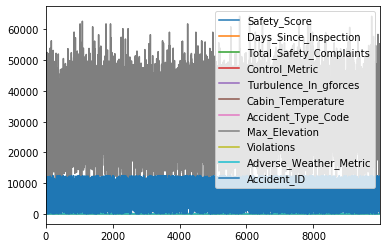

In [6]:
train.plot()

In [7]:
train.corr()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
Safety_Score,1.000000,-0.685386,0.057726,0.000564,0.019603,0.032747,0.173930,0.004451,0.041735,-0.107925,-0.001334
Days_Since_Inspection,-0.685386,1.000000,-0.032055,-0.011963,-0.001564,-0.039140,-0.024718,0.000183,-0.016724,0.040804,0.000582
Total_Safety_Complaints,0.057726,-0.032055,1.000000,-0.019665,0.066412,0.013590,0.034927,0.036855,-0.019005,-0.002713,0.004527
Control_Metric,0.000564,-0.011963,-0.019665,1.000000,-0.643285,-0.008330,0.008385,-0.028375,-0.003284,-0.028296,0.006481
Turbulence_In_gforces,0.019603,-0.001564,0.066412,-0.643285,1.000000,0.010757,-0.007565,0.047625,0.013171,0.039802,-0.014396
Cabin_Temperature,0.032747,-0.039140,0.013590,-0.008330,0.010757,1.000000,0.030682,-0.009186,0.018619,-0.026647,0.014865
Accident_Type_Code,0.173930,-0.024718,0.034927,0.008385,-0.007565,0.030682,1.000000,0.019970,0.046379,-0.739361,-0.012278
Max_Elevation,0.004451,0.000183,0.036855,-0.028375,0.047625,-0.009186,0.019970,1.000000,-0.030513,0.173436,0.008576
Violations,0.041735,-0.016724,-0.019005,-0.003284,0.013171,0.018619,0.046379,-0.030513,1.000000,-0.021578,-0.002047
Adverse_Weather_Metric,-0.107925,0.040804,-0.002713,-0.028296,0.039802,-0.026647,-0.739361,0.173436,-0.021578,1.000000,0.008586


## Data Visualization

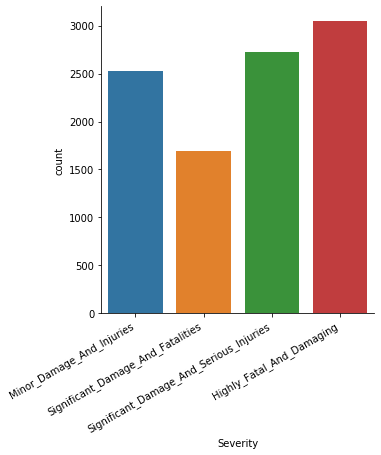

In [10]:
## target is Severity
#bar chart 
sns.catplot(x = 'Severity', kind = 'count', data = train).set_xticklabels(rotation=30, ha='right')


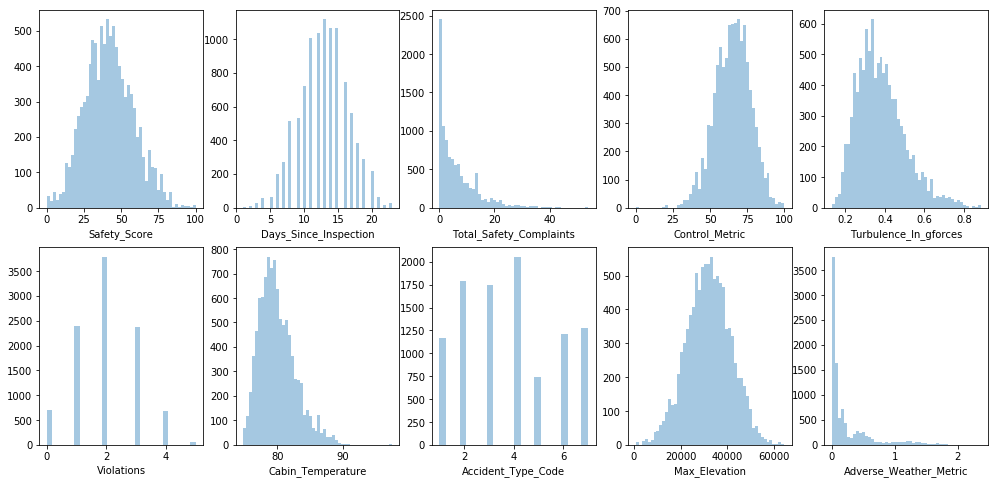

In [11]:
#Feature Variables
#Histogram
f, ax = plt.subplots(2,5, figsize=(17, 8))
sns.distplot(train['Safety_Score'],ax = ax[0,0], kde = False)
sns.distplot(train['Days_Since_Inspection'],ax = ax[0,1], kde = False)
sns.distplot(train['Total_Safety_Complaints'],ax = ax[0,2], kde = False)
sns.distplot(train['Control_Metric'],ax = ax[0,3], kde = False)
sns.distplot(train['Turbulence_In_gforces'],ax = ax[0,4], kde = False)
sns.distplot(train['Violations'],ax = ax[1,0], kde = False)
sns.distplot(train['Cabin_Temperature'],ax = ax[1,1], kde = False)
sns.distplot(train['Accident_Type_Code'],ax = ax[1,2], kde = False)
sns.distplot(train['Max_Elevation'],ax = ax[1,3], kde = False)
sns.distplot(train['Adverse_Weather_Metric'],ax = ax[1,4], kde = False)


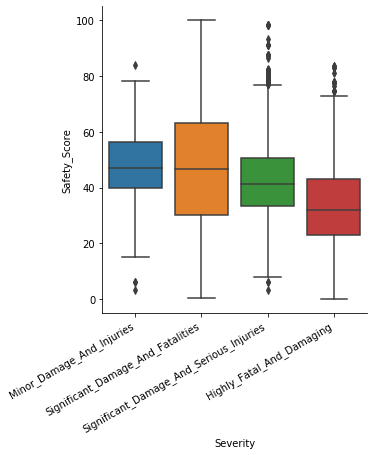

In [12]:
## now for understanding that if thier is any outliers are parsent
sns.catplot(x = 'Severity',y = 'Safety_Score', kind = 'box', data =train).set_xticklabels(rotation=30, ha='right')

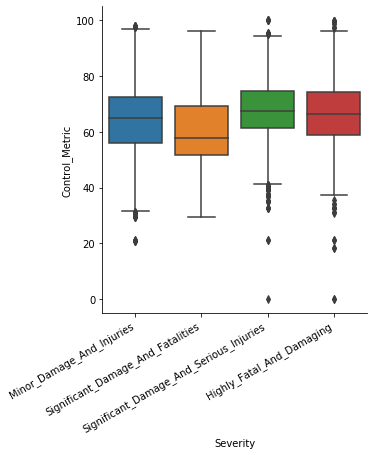

In [13]:
sns.catplot(x = 'Severity',y = 'Control_Metric', kind = 'box', data =train).set_xticklabels(rotation=30, ha='right')

## feature engineering

In [14]:
# this is one of the most import step
factor = pd.factorize(train['Severity'])

In [15]:
train['Severity'] = factor[0]
definitions = factor[1]
train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,0,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,0,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,1,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,2,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,1,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [16]:
# Combining Train and Test Data
train['is_train'] = 1
test['is_train'] = 0

In [17]:
train_drop = train.drop('Severity',axis = 1)
comb = pd.concat([train_drop, test])

In [18]:
# Temperature in kelvin
comb['Cabin_Temperature_kelvin'] = (comb['Cabin_Temperature'] - 32) * 5/9 + 273.15
# log transformation
comb['Turbulence_In_gforces_log'] = np.log(comb['Turbulence_In_gforces'])
comb['Adverse_Weather_Metric_log'] = np.log(comb['Adverse_Weather_Metric'])
# Converting to Binary
comb['Safety_Score_low'] =np.where(comb['Safety_Score'] < 10, 1 , 0)
comb['Days_Since_Inspection_high'] = np.where(comb['Days_Since_Inspection'] > 20, 1 , 0)
comb['Total_Safety_Complaints_high'] = np.where(comb['Total_Safety_Complaints'] > 40, 1 , 0)
comb['Max_Elevation_high'] = np.where(comb['Max_Elevation'] > 45000, 1 , 0)
comb['Max_Elevation_low'] = np.where(comb['Max_Elevation'] < 5000, 1 , 0)
comb['Adverse_Weather_Metric_high'] = np.where(comb['Adverse_Weather_Metric'] > 2, 1 , 0)
comb['Violations_high'] = np.where(comb['Violations'] > 3, 1 , 0)

# Features Selection

In [19]:
feats = [col for col in comb.columns if col not in ['Accident_ID','Severity','is_train']]

In [20]:
# Splitting the train and test data
X_train = comb.loc[comb.is_train == 1, feats]
X_test = comb.loc[comb.is_train == 0, feats]
y_train = train.Severity

In [21]:
# Fitting a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500, max_depth = 10, random_state = 42)
classifier.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [22]:
classifier.score(X_train, y_train) 

0.9095

In [24]:
importances = classifier.feature_importances_
indices = np.argsort(importances)

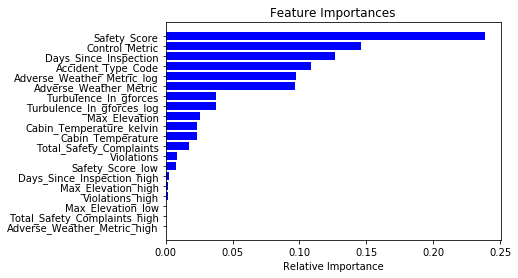

In [25]:
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feats[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importances')
plt.show()

In [26]:
imp_feats = ['Safety_Score','Control_Metric','Days_Since_Inspection','Accident_Type_Code','Adverse_Weather_Metric_log','Turbulence_In_gforces_log']

## Random Forest Classifier

In [27]:
X_train = comb.loc[comb.is_train == 1, imp_feats]
X_test = comb.loc[comb.is_train == 0, imp_feats]
y_train = train.Severity

#  Grid Search CV

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
param_grid = {
    'max_depth' : [8,9,10],
    'n_estimators': [600, 800, 1000]
}

In [30]:
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_
## Gives this optimal output after 15 mins of running
{'max_depth': 10, 'max_features': 5, 'n_estimators': 1000}

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.6min finished


{'max_depth': 10, 'max_features': 5, 'n_estimators': 1000}

In [31]:
classifier = RandomForestClassifier(n_estimators = 1000, max_depth = 10, max_features = 5, random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [32]:
## We again find the performance score for our model,
classifier.score(X_train, y_train)  

0.9768

In [33]:
# Predicting the Test set results
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

In [34]:
def inv_transform(y):
    
    reversefactor = dict(zip(range(len(definitions)),definitions))
    return np.vectorize(reversefactor.get)(y)

## Submission

In [35]:
submit = pd.DataFrame({"Accident_ID":test.Accident_ID,"Severity":pd.Series(y_test_pred)})
submit.head()

,Accident_ID,Severity
0,1,3
1,10,1
2,14,2
3,17,3
4,21,1
